<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/10.LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LDA (Linear Discriminant Analysis)

LDA (Linear Discriminant Analysis) is a supervised learning algorithm for classification tasks. The goal of LDA is to reduce datasets into a lower-dimensional space with good class separability. For this reason, LDA is often compared and confused with PCA (Principal Component Analysis).




## Similarities
- Both reduce dimensionality
- Both try to find new dimensions in the order of importance:
    - PCA: in the order of most variation
    - LDA: in the order of most variation between categories

## Differences

| Category | PCA | LDA  |
| --- | --- | --- |
| Type | unsupervised | supervised |
| Classes | Agnostic of underlying classes | Uses classes differences in separating features |
| Tries to find | maximum variance | maximum class separability |


## Math

### 1. Within-class scatter matrix

$ S_B = \sum\limits_c S_c $

where

$ S_c = \sum\limits_{i \in c} (x_i - \bar x_c)\cdot(x_i - \bar x_c)^T $


### 2. Between-class scatter matrix
$ S_B = \sum\limits_{c} n_c \cdot (\bar x_c - \bar x)\cdot(\bar x_c - \bar x)^T $

### 3. Eigenvalues and Eigenvectors
$ S_W^{-1} S_B $


## Algorithm
[source](https://www.mygreatlearning.com/blog/linear-discriminant-analysis-or-lda/)
1. Compute mean vectors of each class of dependent variable
2. Compute within class ($ S_W $) and between-class ($ S_B $) scatter matrices
3. Compute eigenvalues and eigenvector for $ S_W $ and $ S_B $ - $ S_W^{-1} S_B $
4. Sort the eigenvalues in descending order
5. Select the first k eigenvalues that will be the new k dimensions (linear discriminants)
6. Create a new matrix containing eigenvectors that map to the k eigenvalues
7. Transform the orignal n dimensional data points into k dimensions (= projections with a dot product)




## Code: from scratch

In [17]:
# LDA (Linear Discriminant Analysis) In Python - ML From Scratch 14 - Python Tutorial
# https://youtu.be/9IDXYHhAfGA
# https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/lda.py

import numpy as np


class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None  # store eigenvectors we compute

    def fit(self, X, y):
        # index 0 is the number of samples
        # index 1 is the number of features
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        # 1. Compute the means of each class
        mean_overall = np.mean(X, axis=0)
        print(f"mean_overall: {mean_overall}")

        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c] # get the samples of this label
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # 2. Compute SW and SB
        print(f"SW: {SW}")
        print(f"SB: {SB}")

        # 3. Get eigenvalues and eigenvectors of SW^-1 * SB
        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        print(f"SW^-1 * SB: {A}")
        eigenvalues, eigenvectors = np.linalg.eig(A)
        print(f"eigenvalues: {eigenvalues}, eigenvectors: {eigenvectors}")
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T

        # 4. Sort the eigenvalues
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        print(f"sorted eigenvalues: {eigenvalues} sorted eigenvectors: {eigenvectors}")
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    # get the new features we project
    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)

### Sample data: hand-made data points

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([
      [6., 1.],
      [7., 3.],
      [8., 2.],    
      [9., 0.],
      [8., 4.],
      [8., 6.],
      [9., 2.],    
      [9., 5.]
    ])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

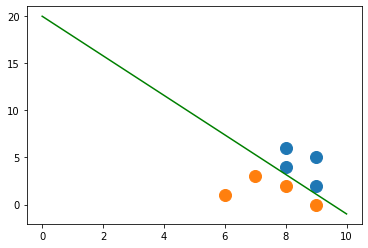

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, y):
  positives = X[y == 1]
  negatives = X[y == 0]

  fig, ax = plt.subplots()
  ax.plot(positives[:, 0], positives[:, 1], marker='o', linestyle='', ms=12, label='+')
  ax.plot(negatives[:, 0], negatives[:, 1], marker='o', linestyle='', ms=12, label='-')
  return ax

# plt.scatter(X[:, 0], X[:, 1])

ax = plot_data(X, y)
x_line = np.linspace(0, 10, 100)
y_line = -2.1*x_line + 20

ax.plot(x_line, y_line, 'g', label='y=wx+b')

mean_overall: [8.    2.875]
SW: [[ 6.   -3.5 ]
 [-3.5  13.75]]
SB: [[ 2.     5.5  ]
 [ 5.5   15.125]]
SW^-1 * SB: [[0.66548043 1.83007117]
 [0.56939502 1.5658363 ]]
eigenvalues: [2.22044605e-16 2.23131673e+00], eigenvectors: [[-0.93979342 -0.75982994]
 [ 0.34174306 -0.65012188]]
sorted eigenvalues: [2.23131673e+00 2.22044605e-16] sorted eigenvectors: [[-0.75982994 -0.65012188]
 [-0.93979342  0.34174306]]
Shape of X: (8, 2)
Shape of transformed X: (8, 2)
X_projected: [[ -5.20910154  -5.29701748]
 [ -7.26917524  -5.55332478]
 [ -7.37888331  -6.83486126]
 [ -6.8384695   -8.45814081]
 [ -8.67912707  -6.15137514]
 [ -9.97937082  -5.46788901]
 [ -8.13871325  -7.77465469]
 [-10.08907889  -6.7494255 ]]


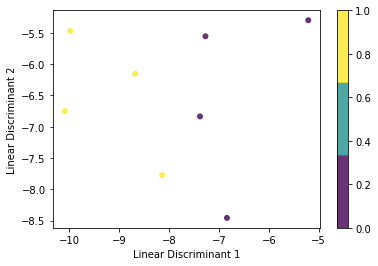

In [19]:
# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)
print(f"X_projected: {X_projected}")
x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

In [22]:
X.mean()

5.4375

In [21]:
X

array([[6., 1.],
       [7., 3.],
       [8., 2.],
       [9., 0.],
       [8., 4.],
       [8., 6.],
       [9., 2.],
       [9., 5.]])

In [20]:
X_projected[:, 0]

array([ -5.20910154,  -7.26917524,  -7.37888331,  -6.8384695 ,
        -8.67912707,  -9.97937082,  -8.13871325, -10.08907889])

## Example: iris dataset from sklearn

In [6]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
X, y = data.data, data.target

### 1. From Scratch

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


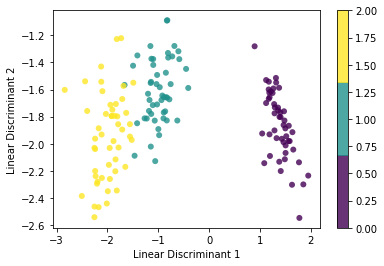

In [7]:

# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

### 2. Using sklearn's LDA

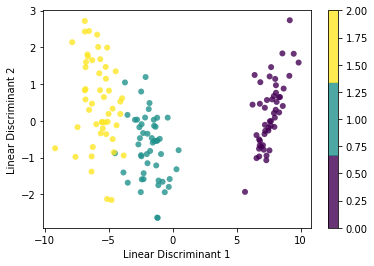

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_reduced = lda.transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()